In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal #A multivariate normal random variable(with mean and covariance)
%matplotlib inline


In [2]:
#Defining the true mean and true variance for both the classes
mean1 = [-1.5, -1]
mean2 = [1, 1]
cov1 = [[1,0], [0,2]]
cov2 = [[1, 0], [0,2]]
#number of data points generated for both classes
N1 = 100
N2 = 100

#try with same covariances and same number of samples
#you will see everything is equally likely (see the priors, the distributions are similar)
#play around with the values

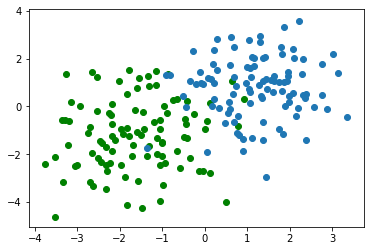

In [3]:
#making the function
def generateData(mean1, mean2, cov1, cov2, N1=100, N2=100):
    #generating data from 2 Gaussians to represent the two classes
    #not needed in practice because we will have the data from the problems we are trying
    
    #taking a function from numpy random to genrate multivariate normal distribution
    class1X = np.random.multivariate_normal(mean1, cov1, N1)
    class2X = np.random.multivariate_normal(mean2, cov2, N2)
    #this function takes data and samples it from the Gaussian
    
    fig = plt.figure()
    #add_subplot(nrows, ncols, index, **kwargs)

    ax = fig.add_subplot(*[1, 1,1]) #add axes to the figure as a part of subplot arrangement
    ax.scatter(class1X[:,0], class1X[:,1], c = 'g')
    ax.scatter(class2X[:,0], class2X[:, 1])
    plt.show()
    return class1X, class2X

class1X, class2X = generateData(mean1, mean2, cov1, cov2, N1, N2)
    
                                        

In [4]:
#Now given this classification, if we get a new data point we shoud be able to say which class it belongs to
#calculate the posterior probability for both class1 and class2 (see notes) (Bayes rule) (insert in markdown)


In [5]:
#Estimating the mean and covariance for each class from the training data
# axis = 0 is for rows
mu1 = np.mean(class1X, axis = 0)
print("mean of class 1", mu1)
cov1 = np.cov(class1X.T)
print("covariance of class 1", cov1)

mu2 = np.mean(class2X, axis = 0)
print("mean of class 2", mu2)
cov2 = np.cov(class2X.T)
print("cov of class 2", cov2)

#Now estimating the priors for each class
#.shape returns dimensions, and [0] will return rows
pC1 = class1X.shape[0]/ (class1X.shape[0] + class2X.shape[0]) #no. of data points in class 1/ total number of data points
print("prior of class 1 is", pC1)
pC2 = class2X.shape[0]/(class1X.shape[0] + class2X.shape[0]) #no. of data points in class 2/total number of data points
print("prior of class 2 is", pC2)



mean of class 1 [-1.61796306 -1.20219795]
covariance of class 1 [[1.12957182 0.16672955]
 [0.16672955 2.13993726]]
mean of class 2 [1.19025765 0.78530455]
cov of class 2 [[0.90847653 0.07041639]
 [0.07041639 1.603386  ]]
prior of class 1 is 0.5
prior of class 2 is 0.5


In [6]:
#now computing value for test
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
x = np.linspace(-5, 4, 100)
y = np.linspace(-6, 6, 100 )

#np.meshgrid - Return coordinate matrices from coordinate vectors.
xm, ym = np.meshgrid(x,y)

#Stack arrays in sequence depth wise (along third axis).
#equivalent to concatenation along the third axis after 2-D arrays of shape (M,N) have been reshaped to (M,N,1) 
#and 1-D arrays of shape (N,) have been reshaped to (1,N,1)
X = np.dstack([xm, ym])

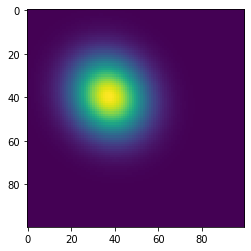

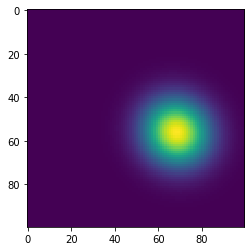

In [7]:
#pdf of class1
y1 = multivariate_normal.pdf(X, mean = mu1, cov =cov1)
#Display data as an image; i.e. on a 2D regular raster.
plt.figure(1)
plt.imshow(y1)

#pdf of class2
y2 = multivariate_normal.pdf(X, mean = mu2, cov = cov2)
plt.figure(2)
plt.imshow(y2)

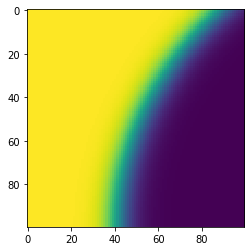

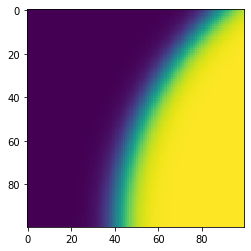

In [8]:
#posterior for class 1 
#posterior = datalikelihood * prior/total
pos1 = (y1 * pC1)/ (y1*pC1 + y2*pC2)
plt.figure(3)
plt.imshow(pos1)

#posterior for class 2
pos2 = (y2 * pC2)/ (y1* pC1 + y2 * pC2)
plt.figure(4)
plt.imshow(pos2)

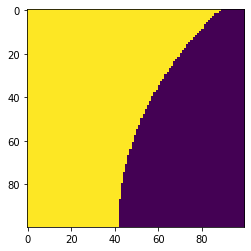

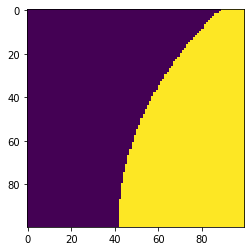

In [9]:
#lookig a  the decision boundary when posterio of class 1 > 2
plt.figure(5)
plt.imshow(pos1 > pos2)

#and the other way
plt.figure(6)
plt.imshow(pos2 > pos1)